<a href="https://colab.research.google.com/github/luisdiasbh/ufmg-dcc-ciberseguranca-2021/blob/main/lab01_classifying_security_vulnerabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Security Vulnerabilities

Grupo 3

# Exercise

Now let's train a classifier to classify security vulnerabilities according to their CVSS severity class. The dataset provided below contains the CVSS features and severity for all of the vulnerabilities reported in 2020. The vulnerabilities are separated in four severity classes:

- 0 = 'LOW'
- 1 = 'MIDDLE'
- 2 = 'HIGH'
- 3 = 'CRITICAL'


In [ ]:
# Download the dataset
!wget "https://homepages.dcc.ufmg.br/~arturluis/202ds/2020cvss.csv" --no-check-certificate -nc

In [2]:
# Read it and print the first five rows
import pandas as pd
cvss_data = pd.read_csv('2020cvss.csv')
cvss_data.iloc[0:5]

,Unnamed: 0,attackVector,attackComplexity,privilegesRequired,userInteraction,confidentialityImpact,integrityImpact,availabilityImpact,label
0,0,0.55,0.44,0.62,0.85,0.66,0.66,0.66,2
1,1,0.85,0.44,0.85,0.62,0.66,0.66,0.66,2
2,2,0.55,0.77,0.62,0.62,0.66,0.66,0.66,1
3,3,0.55,0.44,0.62,0.85,0.00,0.00,0.66,1
4,4,0.55,0.44,0.27,0.85,0.66,0.66,0.66,1


In this dataset we have seven features, corresponding to fields used to compute the CVSS score and severity:
- Attack Vector
- Attack Complexity
- Privileges Required
- User Interaction
- Confidentiality Impact
- Integrity Impact
- Availability Impact

Note that the features in the dataset were converted to a numerical score representation, following the [CVSS score metrics](https://www.first.org/cvss/specification-document). We have to do this conversion because the SVM algorithm expects numbers as input.

Now it's your turn, use this dataset to train and evaluate a SVM classifier that learns to classify the severity of a vulnerability based on its CVSS features. The steps for this are outlined in the cell below, we have already split the data into training and test for you, fill the remaining gaps with your code. 


Important! Before you start, create a copy of this notebook to your google drive and work on your copy.

Once you are done, submit your solutions here: https://forms.gle/DDpGDkjNQWFgJvky8



In [4]:
#### Split dataset into training and testing sets
from sklearn import model_selection
inputs_train, inputs_test, labels_train, labels_test = model_selection.train_test_split(
      cvss_data[["attackVector", "attackComplexity", "privilegesRequired", "userInteraction", "confidentialityImpact", "integrityImpact", "availabilityImpact"]].values,
      cvss_data['label'].values,
      test_size=0.2
    )
print("Training set size:", inputs_train.shape)
print("Test set size:", inputs_test.shape)

Training set size: (11452, 7)
Test set size: (2863, 7)


In [5]:
### Fit the SVM classifier
from sklearn.svm import SVC

# Selecting the classifier we want to use
svm = SVC(kernel="linear")

# Learning (or training our model) based on inputs and labels from our dataset
svm.fit(inputs_train, labels_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
### Try out your classifier using the vulnerability below:
vulnerability = [[0.85, 0.44, 0.27, 0.85, 0.66, 0.  , 0.  ]]

# Use our model to predict which class this is
vulnerability_class = svm.predict(vulnerability)
if vulnerability_class == 0 :    vulnerability_class = 'LOW'
elif vulnerability_class == 1 :  vulnerability_class = 'MIDDLE'
elif vulnerability_class == 2 :  vulnerability_class = 'HIGH'
else :  vulnerability_class = 'CRITICAL'

print (vulnerability_class)

MIDDLE


In [24]:
### Use your classifier to classify the test set
classifications = svm.predict(inputs_test)
print (classifications[0:10])

[3 3 2 2 3 1 1 2 3 2]


In [16]:
### Compute the final accuracy, precision, and recall on the test set
# tip: use sklearn's "macro" averaging to compute precision and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", '{:0.2f}'.format(accuracy_score(labels_test, classifications)*100))
print('Precision:', '{:0.2f}'.format(precision_score(labels_test, classifications, average='macro')))
print('Recall:', '{:0.2f}'.format(recall_score(labels_test, classifications, average='macro')))


Accuracy: 95.04
Precision: 0.96
Recall: 0.90


In [20]:
### Finally, compute the confusion matrix for the testing set
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(labels_test, classifications)
print (conf_matrix)

[[  59   17    0    0]
 [   3 1126   27    0]
 [   0   42 1174    0]
 [   0    0   53  362]]


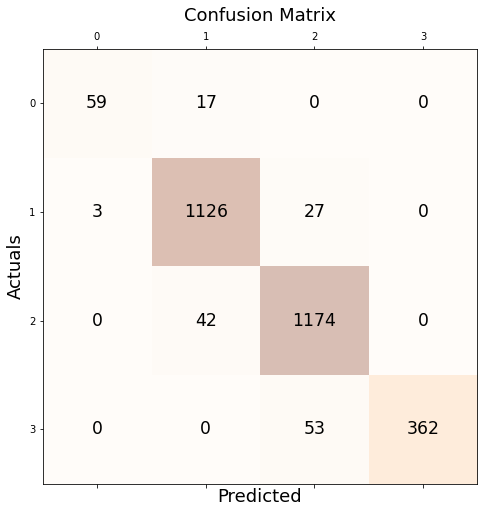

In [21]:
### Print the confusion matrix using Matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, classifications))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        76
           1       0.95      0.97      0.96      1156
           2       0.94      0.97      0.95      1216
           3       1.00      0.87      0.93       415

    accuracy                           0.95      2863
   macro avg       0.96      0.90      0.92      2863
weighted avg       0.95      0.95      0.95      2863

